# Principal Component Analysis

<div style="text-align: right">By: Goutham Kumar R <br/>Notebook created on: 04th December 2020</div>

### How to Calculate PCA:
1. Centre the data
2. Compute Covariance matrix S
3. Find the eigenvalues and eigenvectors of S
4. The eigenvectors becomes the principal components and the eigenvalues provide the explained variance in the data
5. Project the data to the new dimensions



In [3]:
#Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

from math import pi
from math import sin

#for high resoultion graphs
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') 

In [4]:
def correlated_variables(start=10, stop=10 ,step=0.5, mu=0, sigma=3, f=lambda x: x):
    """Correalted variables: This is a function to create correlated variables with some noise"""
    x = np.arange(start, stop, step)
    #adding some noise(error)
    e = np.random.normal(mu, sigma, x.size)
    #another variable
    y = np.zeros(x.size)
    #creating correlated variable with noise
    for i in range(x.size):
        y[i] = f(x[i] + e[i])   #f can be changed by user
        
    return x,y

In [5]:
#seeting seed to get same value throught eh experiment
np.random.seed(7)

x1, x2 = correlated_variables(2,4,0.2,2,f = lambda x : 2*sin(x))  #second variable is 2*sin(x)
#adding it to a matrix
A = np.column_stack((x1,x2))
A

array([[ 2.        ,  0.69180567],
       [ 2.2       ,  0.66585175],
       [ 2.4       , -1.95440887],
       [ 2.6       , -0.88903663],
       [ 2.8       ,  1.30118101],
       [ 3.        , -1.9142962 ],
       [ 3.2       , -1.76940597],
       [ 3.4       ,  0.27081964],
       [ 3.6       ,  1.39485835],
       [ 3.8       ,  1.93658872]])

In [6]:
#plotting the datapoints
def plot(A, title):
    f, ax = plt.subplots(figsize=(8,8))
    ax.scatter(A[:,0],A[:,1])          #scatter plot for numerical data
    ax.set_title(title)
    ax.set_aspect("equal")   
    ax.grid(True)
    #axis limit
    plt.xlim([-5,5])
    plt.ylim([-5,5])

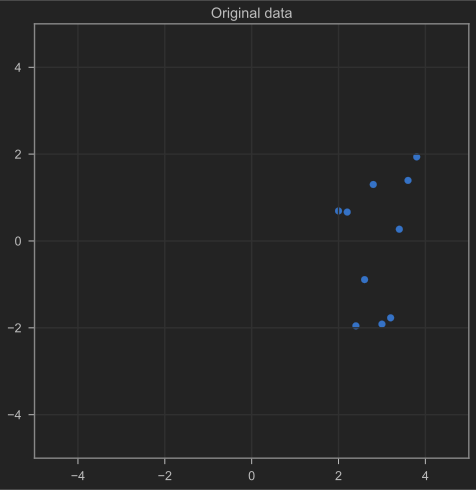

In [7]:
plot(A, title="Original data")

## 1. Centre the data:

> why?

If you don't center your data, the 1st principal component may pierce the cloud not along the main direction of the cloud, and will be misleading.


In [8]:
#centre the data by subtracting the mean
A = (A - np.mean(A, axis=0))
A

array([[-0.9       ,  0.71840993],
       [-0.7       ,  0.692456  ],
       [-0.5       , -1.92780462],
       [-0.3       , -0.86243238],
       [-0.1       ,  1.32778526],
       [ 0.1       , -1.88769195],
       [ 0.3       , -1.74280171],
       [ 0.5       ,  0.2974239 ],
       [ 0.7       ,  1.42146261],
       [ 0.9       ,  1.96319298]])

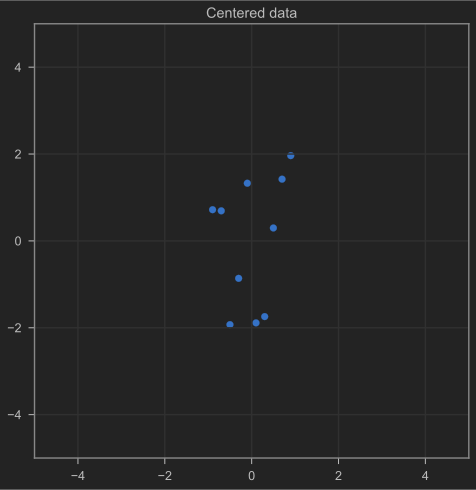

In [9]:
plot(A, title="Centered data")

## 2. Calculating Covariance Matrix S:

> why do we need Covariance matrix?

If we take the covariance matrix and multiply it with any random vector, this vector will turn towards the direction of greatest variance.

The covariance Matrix S :
[[0.36666667 0.23972946]
 [0.23972946 2.19808048]]


The vector 'v' is :
 [[-0.5]
 [-0.5]]


(-5.0, 5.0)

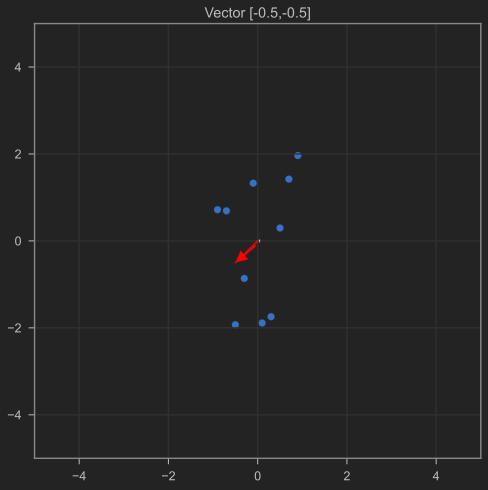

In [46]:
#quick demo - property of covariance matrix

#plot for vector
def arrow(ax, start, stop):
    ax.annotate(",",xytext=start, xy=stop, arrowprops=dict(facecolor="red", width=2.0))

#calcualting the Covariance matrix
S = np.dot(A.T, A)/ (A.shape[0]-1)   #covmatrix = A.T*A/n-1
print("The covariance Matrix S :\n{0}\n".format(S))

#creating a vector v
v = np.array([[-0.5],[-0.5]])
print("\nThe vector 'v' is :\n",v)

#plotting the vector along wiht our datapoints
f, ax = plt.subplots(1,1,sharey=True, figsize=(8,8))
ax.scatter(A[:,0],A[:,1])
ax.set_title("Vector [-0.5,-0.5]")
ax.grid(True)
ax.plot([0,v[0]],[0,v[1]], c="red")
arrow(ax,(0,0),(v[0],v[1]))    #callling the annoate arrow fn

plt.xlim([-5,5])
plt.ylim([-5,5])

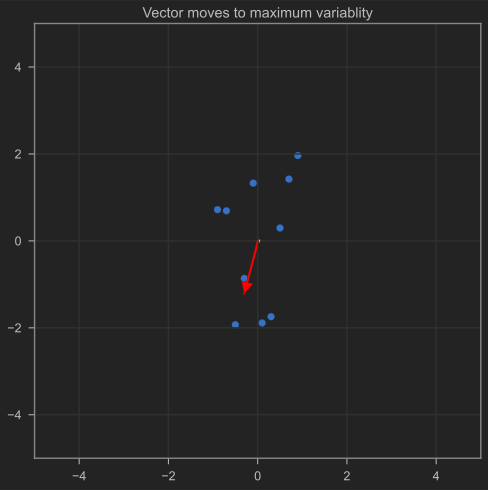

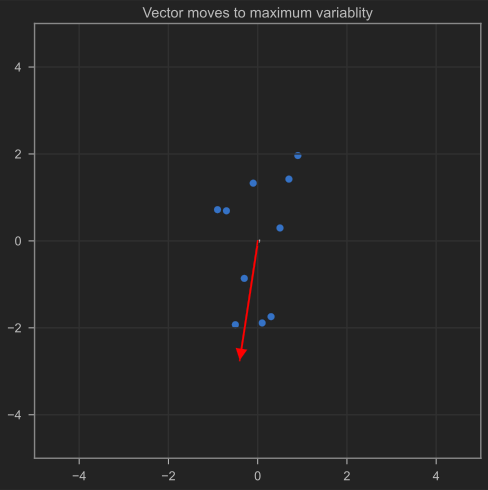

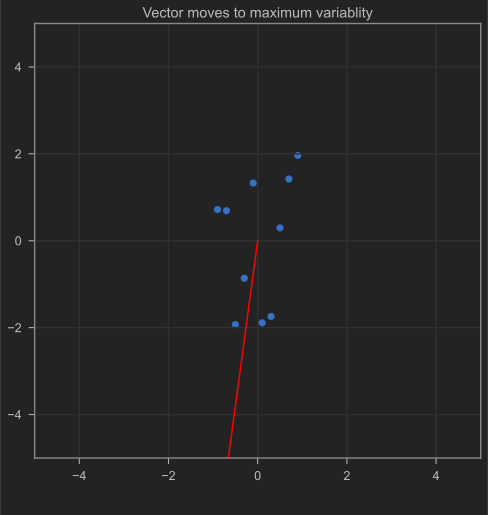

In [45]:
#multiplying the vector with covariance matrix
for i in range(1,4):
    v = np.dot(S,v)

    #plotting the vector along wiht our datapoints
    f, ax = plt.subplots(1,1,sharey=True, figsize=(8,8))
    ax.scatter(A[:,0],A[:,1])
    ax.set_title("Vector moves to maximum variablity")
    ax.grid(True)
    ax.plot([0,v[0]],[0,v[1]], c="red")
    arrow(ax,(0,0),(v[0],v[1]))    #callling the annoate arrow fn

    plt.xlim([-5,5])
    plt.ylim([-5,5])

we can clearly observe that the vector changes it direction and moves towards the maximum variabilty and also grows after reaching the direction of maximum variance.

## 3. Compute the Eigen value and Eigen Vectors:

>why?

Eigen Vectors are those vectors when multiplied by covariance matrix, remains the same(does'nt change the direction) but only changes in magnitude. So, we don't need to do the above iteration again and again. This Eigen vector is already facing the maximum variablity direction and it only scales when we multipy by covariance matrix.

In [49]:
#eigen values from scratch
#l1, l2 -> lambda 1 and lambda 2
l1 = (S.trace() + np.sqrt(pow(S.trace(),2) - 4*np.linalg.det(S)))/2
l2 = (S.trace() - np.sqrt(pow(S.trace(),2) - 4*np.linalg.det(S)))/2

print("\nThe Eigen Values are:\nLambda1 l1:{0}\nLambda2 l2:{1}".format(l1,l2))


The Eigen Values are:
Lambda1 l1:2.228940718384411
Lambda2 l2:0.3358064331480112


In [57]:
#eigen vectors
A1 = S - l1*np.identity(2)
A2 = S - l2*np.identity(2)
#by Cayley-Hamilton theorem
E1 = A2[:,1]
E2 = A1[:,0]
#normalising the eigen vectors
E1 = E1 / np.linalg.norm(E1)
E2 = E2 / np.linalg.norm(E2)

print("\nThe Eigen Vectors are:\nE1:{0}\nE2:{1}\n".format(E1,E2))

#stack those vector to get matrix
E = np.column_stack((E1,E2))
print("The Eigen matrix:\n",E)


The Eigen Vectors are:
E1:[0.12767589 0.99181594]
E2:[-0.99181594  0.12767589]

The Eigen matrix:
 [[ 0.12767589 -0.99181594]
 [ 0.99181594  0.12767589]]


In [54]:
#verification of eigen values and eigen vectors
evals , evecs = np.linalg.eigh(S)
print("Eigen values:\n",evals)
print("Eigen vectors:\n",evecs)

Eigen values:
 [0.33580643 2.22894072]
Eigen vectors:
 [[-0.99181594  0.12767589]
 [ 0.12767589  0.99181594]]


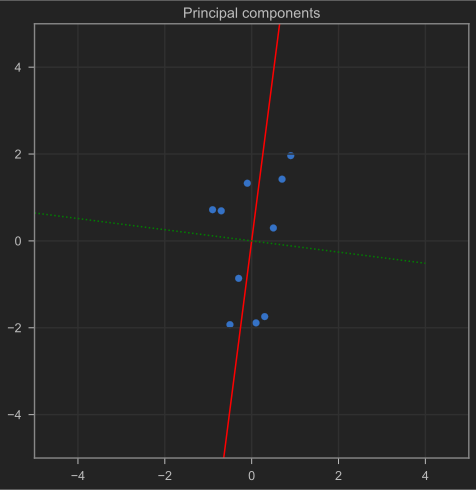

In [67]:
#getting the slope of eigen vectors and appending it to list
x = list()
y = list()
z = list()
for i in range(-5,5):
    x.append(i)
    y.append(E[1,0]*i/E[0,0])   #this is PC1 
    z.append(E[1,1]*i/E[0,1])   #this is PC2

#plotting the PC1 and PC2
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(A[:,0],A[:,1])          #scatter plot for numerical data
ax.set_title("Principal components")
ax.set_aspect("equal")   
ax.grid(True)
#axis limit
plt.xlim([-5,5])
plt.ylim([-5,5])
ax.plot(x,y, linestyle="-" ,color="red")    #PC1
ax.plot(x,z, linestyle=":", color="green")  #PC2

## 4. Projection of Datapoints onto Principal components:

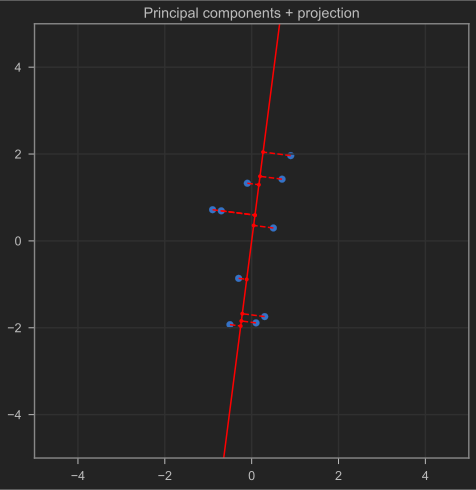

In [74]:
#visual projection
#code reference - Nikolay Manchev 
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(A[:,0],A[:,1])          #scatter plot for numerical data
ax.set_title("Principal components + projection")
ax.set_aspect("equal")   
ax.grid(True)
#axis limit
plt.xlim([-5,5])
plt.ylim([-5,5])
ax.plot(x,y, linestyle="-" ,color="red")  #PC1

p0 = [x[0],y[0]]
p1 = [x[len(x)-1],y[len(x)-1]]

a = np.array([[p1[0]-p0[0], p1[1]-p0[1]],
             [p0[1]-p1[1], p1[0]-p0[0]]])

for i in range(0, len(A)):
    q = A[i]
    
    b = -np.array([-q[0]*(p1[0]-p0[0]) - q[1]*(p1[1]-p0[1]),
                  -p0[1]*(p1[0]-p0[0]) + p0[0]*(p1[1]-p0[1])])
    
    proj = np.linalg.solve(a,b)
    
    ax.plot(proj[0],proj[1], "bo", markersize=4, color="red")
    ax.plot((q[0],proj[0]),(q[1],proj[1]), linestyle="--", color="red")

In [81]:
#projecting the datapoints onto the new dimension

P1 = np.dot(A,E1) #pc1  #if you want to project onto PC1, hash the next line
P2 = np.dot(A, E2) #pc2 

P = np.column_stack((P1,P2))
print("\nThe new projected Datapoints are:\n",P)


The new projected Datapoints are:
 [[ 0.59762212  0.98435798]
 [ 0.59741578  0.7826811 ]
 [-1.9758653   0.2497738 ]
 [-0.89367695  0.18743296]
 [ 1.304151    0.26870776]
 [-1.85947538 -0.34019434]
 [-1.69023576 -0.52005854]
 [ 0.35882771 -0.45793411]
 [ 1.4992024  -0.51278466]
 [ 2.0620344  -0.64198194]]


In [78]:
#verification
from sklearn import decomposition 
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(A)
pc

array([[ 0.59762212,  0.98435798],
       [ 0.59741578,  0.7826811 ],
       [-1.9758653 ,  0.2497738 ],
       [-0.89367695,  0.18743296],
       [ 1.304151  ,  0.26870776],
       [-1.85947538, -0.34019434],
       [-1.69023576, -0.52005854],
       [ 0.35882771, -0.45793411],
       [ 1.4992024 , -0.51278466],
       [ 2.0620344 , -0.64198194]])

References:
* 
https://stats.stackexchange.com/questions/22329/how-does-centering-the-data-get-rid-of-the-intercept-in-regression-and-pca
* https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors
* https://en.wikipedia.org/wiki/Cayley%E2%80%93Hamilton_theorem